# NE 630 - Lesson 07

## Summary Of Equations

The probability that a neutron of energy $E$ smacks a nucleus of mass $A$ elastically and leaves with an energy $E'$ is 

$$
p(E\to E') = 
  \begin{cases}
    \frac{1}{(1-\alpha)E} & \alpha E \leq E' \leq E \\
    0 & \text{otherwise} \, ,
  \end{cases}
\tag{FNRP 2.47}
$$

where 

$$
 \alpha = \frac{(A-1)^2}{(A+1)^2}
 \tag{FRNP 2.48}
$$

The notation $p(E\to E')$ is common to particle transport, reactor physics, and related areas.  A more common notation would be $p(E'; E)$, which indicates that the (random) variable of interest is $E'$, while $E$ is a parameter.  A familiar example is the Gaussian or normal distribution, often denoted by $N(x; \mu, \sigma^2)$, where $x$ is the variable and the mean $\mu$ and variance $\sigma^2$ are parameters.

If $p(x)$ is a probability density function, and if $x$ is restricted to a range of values called the "support", e.g., $x_L \leq x \leq x_R$, then  

$$
  \int^{x_U}_{x_L} p(x) dx = 1 \qquad \text{and} \qquad p(x) \leq 0 \, \text{for all}~x \in [x_U, x_L] \, .
$$

The probability that $x \in [a, b]$ (with $a \geq x_L$ an $b \leq x_U$) is 

$$
 P(a \leq x \leq b) = \int^{b}_{a} p(x) dx \, .
$$


The expected value of some function $f(x)$ is 

$$
  E[f(x)] = \bar{f} =  \int^{x_U}_{x_L} f(x) p(x) dx \, .
$$

The outgoing energy $E'$ is related to the scattering angle $\theta_{cm}$ in the center-of-mass system according to
$$
\frac{E'}{E} = \frac{A^2 + 2A\cos{\theta_{cm}} + 1}{(A+1)^2} \, .
\tag{Rydin 2.18}
$$

The scattering angle $\theta_L$ in the laboratory system is related to $\theta_{cm}$ according to

$$
  \cos \theta_L = \frac{1+A\cos\theta_{cm}} {\sqrt{A^2 + 2A \cos \theta_{cm} + 1}} \, .
  \tag{Rydin 2.21}
$$

For *isotropic scattering* in the CM system, the average cosine of $\theta_L$ is
$$
   \overline{\cos{\theta}_L} \equiv \bar{\mu} = \frac{2}{3A} 
   \tag{Rydin 2.56}
$$

(And scattering is very often isotropic in the CM system; only for high energies ($>1$ MeV) does scattering become anisotropic.)

The *average logarithmic energy loss* aka **slowing down decrement** is

$$
  \xi = \overline{\ln(E/E')} 
    = 1 + \frac{\alpha}{1-\alpha}\ln\alpha 
  \tag{FNRP 2.54 and 2.56}
$$

The number of elastic collisions $n$ needed to reduce a neutron's energy from $E_0$ to $E_n$ is approximately

$$
  n = \frac{1}{\xi} \ln(E_0/E_n) \, .
  \tag{FNRP 2.59}
$$

## Distribution of Scattering Angles in the Center of Mass System

Show below is $p(\cos\theta_{cm})$ for O-16 and 4 neutron energies.  The $10^{-5}$ eV curve is flat, i.e., the scattering of thermal neutrons off oxygen nuclei is isotropic (uniform).  However, at energies around 10 keV, scattering deviates, and by 175 keV (as shown), the deviation is large enough to see.  In this case, the probability is skewed to negative values of $\mu_cm = \cos\theta_cm$, i.e., the neutron is more likely to scatter *backward* than *forward*.  The shape changes quite drastically around 1 MeV and then becomes very forward peaked for even higher energies.  

**Key Point**: Scattering is approximately isotropic for neutrons with energies below 1 MeV in the center-of-mass system.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mu, a, b, c, d = np.loadtxt("oxygen_scattering.csv", unpack=True, skiprows=1, delimiter=",")

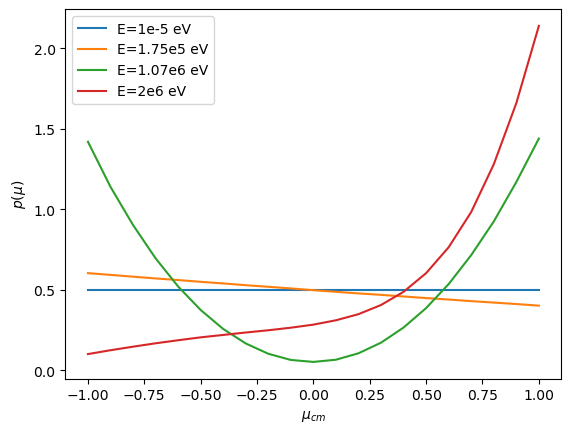

In [3]:
plt.plot(mu, a, label="E=1e-5 eV")
plt.plot(mu, b, label="E=1.75e5 eV")
plt.plot(mu, c, label="E=1.07e6 eV")
plt.plot(mu, d, label="E=2e6 eV")
plt.legend()
plt.ylabel("$p(\mu)$")
plt.xlabel("$\mu_{cm}$");

## Distribution of Scattering Angles in the Laboratory System

Shown below is $p(\mu_{L})$ for several different target masses assuming $p(\mu_{cm}) = \frac{1}{2}$ (i.e., that scattering is isotropic in the center-of-mass-system).

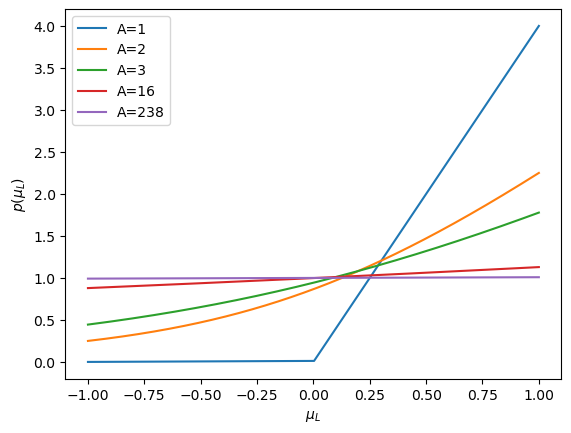

In [4]:
mu_CM = np.linspace(-1, 1, 100000) 
for A in [1.000001, 2, 3, 16, 238]:
    mu_L_vals = (1+A*mu_CM)/np.sqrt(A**2 + 2*A*mu_CM + 1)
    p_mu_L = (A**2 + 2*A*mu_CM+1)**1.5 / (A**2 * (A+mu_CM))
    plt.plot(mu_L_vals, p_mu_L, label="A={:.0f}".format(A))
plt.xlabel("$\mu_L$"); plt.ylabel("$p(\mu_L)$"); plt.legend();

Remember, this is all based on an *isotropic* distribution in the CM system.  Scattering in the LAB system is definitely *not* isotropic for light nuclei, further illustrated by the expected value of the scattering cosine: $\bar{\mu}_L = \frac{2}{3A}$.  For large $A$, $\bar{\mu}_L \approx 0$, but for light nuclei, neutrons tend to keep moving forward.  That impacts the neutron "diffusion" we'll learn about later on!

## A Simulation

How many elastic collisions in water are needed to slow a neutron from 2 MeV to 1 eV?  From FNRP (2.59):

In [4]:
E0 = 2e6
En = 1.0
np.log(E0/En)/0.924

15.702010539528375

Alternatively, we can simulate the process. The comments in the code below indicate the basic ideas being implemented.

In [5]:
np.random.seed = 123 # set the seed to make this repeatable
n = 10000            # number of neutrons to simulate
counts = np.zeros(n) # number of collisions for each neutron

for i in range(n):
    
    E = E0  # initialize my energy to 2 MeV
    while E > En:

        x = np.random.rand() # get a random number between 0 and 1
        if x < 3.8/(3.8+2*20):
            A = 16 # I scatter off of O
        else:
            A = 1  # I scatter off of H
        alpha = (A-1)**2 / (A+1)**2 
        
        # Pick my new energy uniformly from between alpha*E to E
        x = np.random.rand() # get another random number
        E_prime = (E-alpha*E)*x + alpha*E 
        counts[i] += 1 # Increment my collision counter
        E = E_prime    # My outgoing energy becomes my initial energy

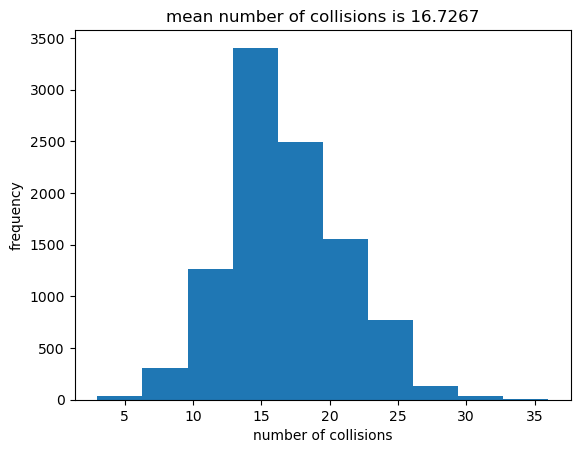

In [7]:
plt.hist(counts)
plt.xlabel("number of collisions")
plt.ylabel("frequency")
plt.title("mean number of collisions is {}".format(np.mean(counts)));

Note that the estimated mean is about 1 collision more than we predicted. The theoretical result tells us how many collisions would get us *exactly* to 1 eV but no further.  However, the simulation can only count a particle after it's gotten to 1 eV or below.  The chance a neutron gets *exactly* to 1 eV is essentially zero, so we need the extra collision to go past.

**Critical Thinking** We can compute the expected outgoing energy from a single collision (that was $E(1+\alpha)/2$).  Couldn't we go from $E_0$ to $E_0 (1+\alpha)/2$ to $E_0 [(1+\alpha)/2]^2$ all the way down to $E_n = E_0 [(1+\alpha)/2]^n$?  Then wouldn't $n = \frac{\ln (E_n/E_0)}{\ln((1+\alpha)/2))}$?